# Projekat 1 - nadgledano učenje

# Preprocesiranje

### Importovanje biblioteka

In [84]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

### Učitavanje podataka

In [19]:
df=pd.read_csv("spg.csv")

### Dimenzije dataset-a

In [20]:
df.shape

(4213, 21)

### Prikaz prvih 5 redova

In [24]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


### Prikaz zadnjih 5 redova

In [26]:
df.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


### Opis atributa dataset-a

temperature_2_m_above_gnd = Temperatura vazduha izmerena na visini od 2m iznad zemlje ($^{\circ}C$) <br>
relative_humidity_2_m_above_gnd = Relativna vlažnost vazduha izmerena na visini od 2m iznad zemlje ($\%$) <br>
mean_sea_level_pressure_MSL = Srednji pritisak na nivou mora ($hPa$) <br>
total_precipitation_sfc = Ukupna količina padavina na površini ($mm$) <br>
snowfall_amount_sfc = Količina snega koja je pala na površini ($mm$) <br>
total_cloud_cover_sfc = Ukupni procenat pokrivenosti oblacima iznad površine ($\%$) <br>
high_cloud_cover_high_cld_lay = Pokrivenost visokim oblacima ($\%$) <br>
medium_cloud_cover_mid_cld_lay = Pokrivenost srednjim oblacima ($\%$) <br>
low_cloud_cover_low_cld_lay = Pokrivenost niskim oblacima ($\%$) <br>
shortwave_radiation_backwards_sfc = Količina kratkotalasnog zračenja koje se reflektuje od površine ($W/m^2$) <br>
wind_speed_10_m_above_gnd = Brzina vetra na visini od 10 metara iznad zemlje ($m/s$) <br>
wind_direction_10_m_above_gnd = Pravac vetra na visini od 10 metara iznad zemlje ($^{\circ}$) <br>
wind_speed_80_m_above_gnd = Brzina vetra na visini od 80 metara iznad zemlje ($m/s$) <br>
wind_direction_80_m_above_gnd= Pravac vetra na visini od 80 metara iznad zemlje ($^{\circ}$) <br>
wind_speed_900_mb = Brzina vetra na nivou pritiska od 900 mb ($m/s$) <br>
wind_direction_900_mb = Pravac vetra na nivou pritiska od 900 mb ($^{\circ}$) <br>
wind_gust_10_m_above_gnd = Najjači nalet vetra na visini od 10 metara iznad zemlje ($m/s$) <br>
angle_of_incidence = Ugao pod kojim sunčevi zraci padaju na površinu ($^{\circ}$) <br>
zenith = Ugao između sunca i vertikale ($^{\circ}$) <br>
azimuth = Pravac sunca u horizontalnoj ravni ($^{\circ}$) <br>

### Izlazni atribut
generated_power_kw = Količina generisane energije iz solarnih panela ($kW$)

### Prikaz tipova podataka

In [28]:
df.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

### Prikaz informacija o podacima

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

### Provera da li postoje nedostajuće vrednosti

In [32]:
df.isna().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

### Provera da li postoje duplikati

In [34]:
duplicates=df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4208    False
4209    False
4210    False
4211    False
4212    False
Length: 4213, dtype: bool

In [36]:
print(f"Broj duplikata je: {duplicates.sum()}")

Broj duplikata je: 0


### Statistički opis

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2_m_above_gnd,4213.0,15.068111,8.853677,-5.350000,8.390000,14.750000,21.290000,34.90000
relative_humidity_2_m_above_gnd,4213.0,51.361025,23.525864,7.000000,32.000000,48.000000,70.000000,100.00000
mean_sea_level_pressure_MSL,4213.0,1019.337812,7.022867,997.500000,1014.500000,1018.100000,1023.600000,1046.80000
total_precipitation_sfc,4213.0,0.031759,0.170212,0.000000,0.000000,0.000000,0.000000,3.20000
snowfall_amount_sfc,4213.0,0.002808,0.038015,0.000000,0.000000,0.000000,0.000000,1.68000
total_cloud_cover_sfc,4213.0,34.056990,42.843638,0.000000,0.000000,8.700000,100.000000,100.00000
high_cloud_cover_high_cld_lay,4213.0,14.458818,30.711707,0.000000,0.000000,0.000000,9.000000,100.00000
medium_cloud_cover_mid_cld_lay,4213.0,20.023499,36.387948,0.000000,0.000000,0.000000,10.000000,100.00000
low_cloud_cover_low_cld_lay,4213.0,21.373368,38.013885,0.000000,0.000000,0.000000,10.000000,100.00000
shortwave_radiation_backwards_sfc,4213.0,387.759036,278.459293,0.000000,142.400000,381.810000,599.860000,952.30000


### Distribucija atributa

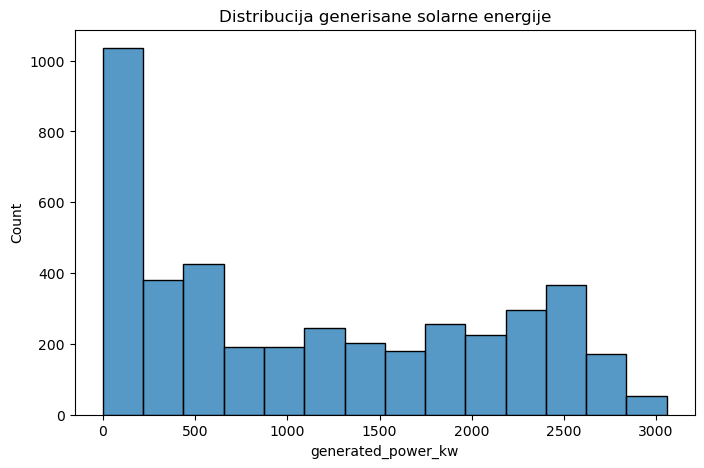

In [55]:
plt.figure(figsize=(8,5))
plt.title(f"Distribucija generisane solarne energije")
sns.histplot(df['generated_power_kw'])
plt.show()

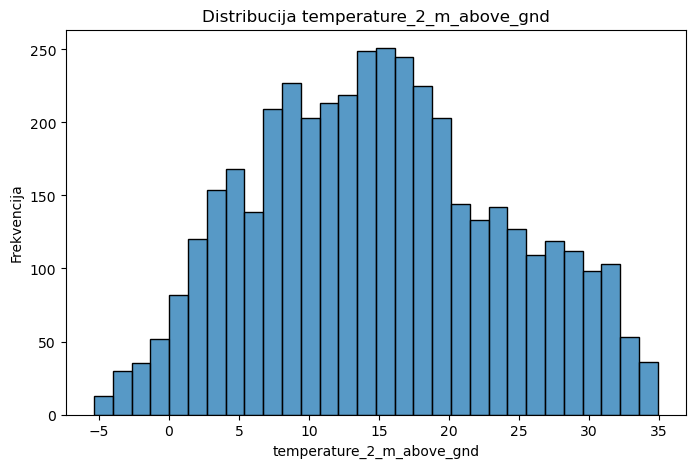

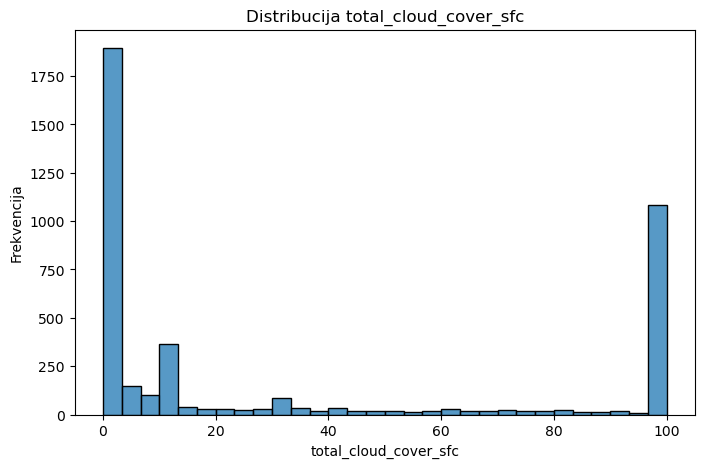

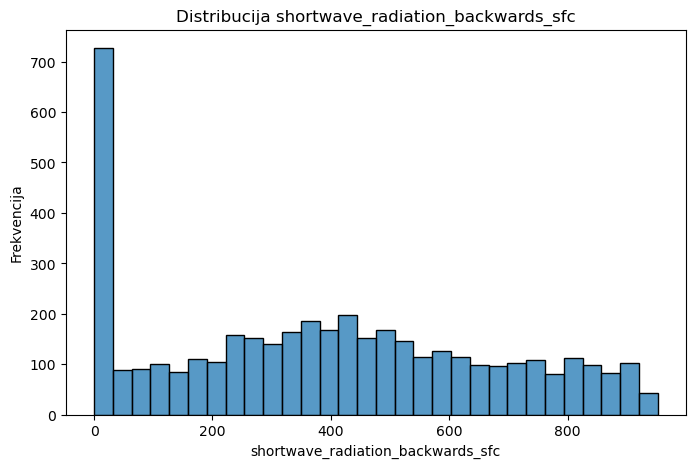

In [42]:
features = ['temperature_2_m_above_gnd', 'total_cloud_cover_sfc', 'shortwave_radiation_backwards_sfc']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30)
    plt.title(f"Distribucija {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekvencija")
    plt.show()

### Boxplot

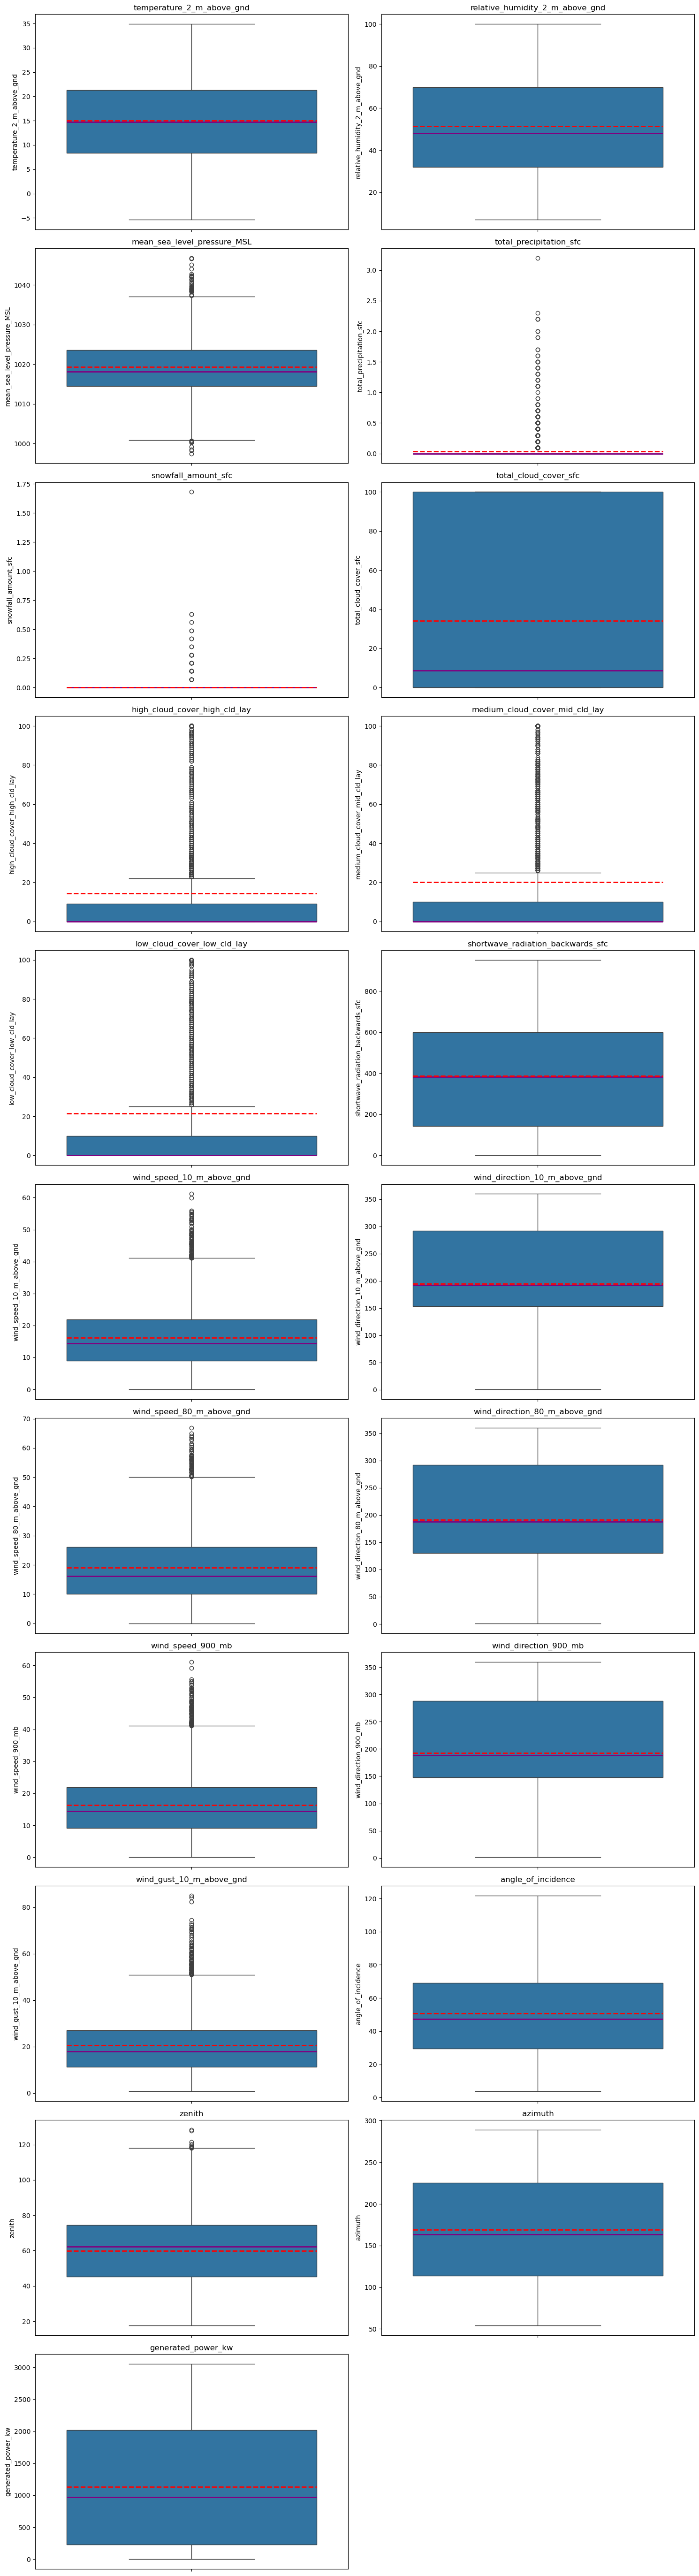

In [46]:
cols = 2 
rows = math.ceil(df.shape[1] / cols)

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(
        y=df[feature], 
        showmeans=True, 
        meanline=True,
        meanprops={'color': 'red', 'linewidth': 2},
        medianprops={'color': 'purple', 'linewidth': 2}
    )
    plt.title(f"{feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Violin plot

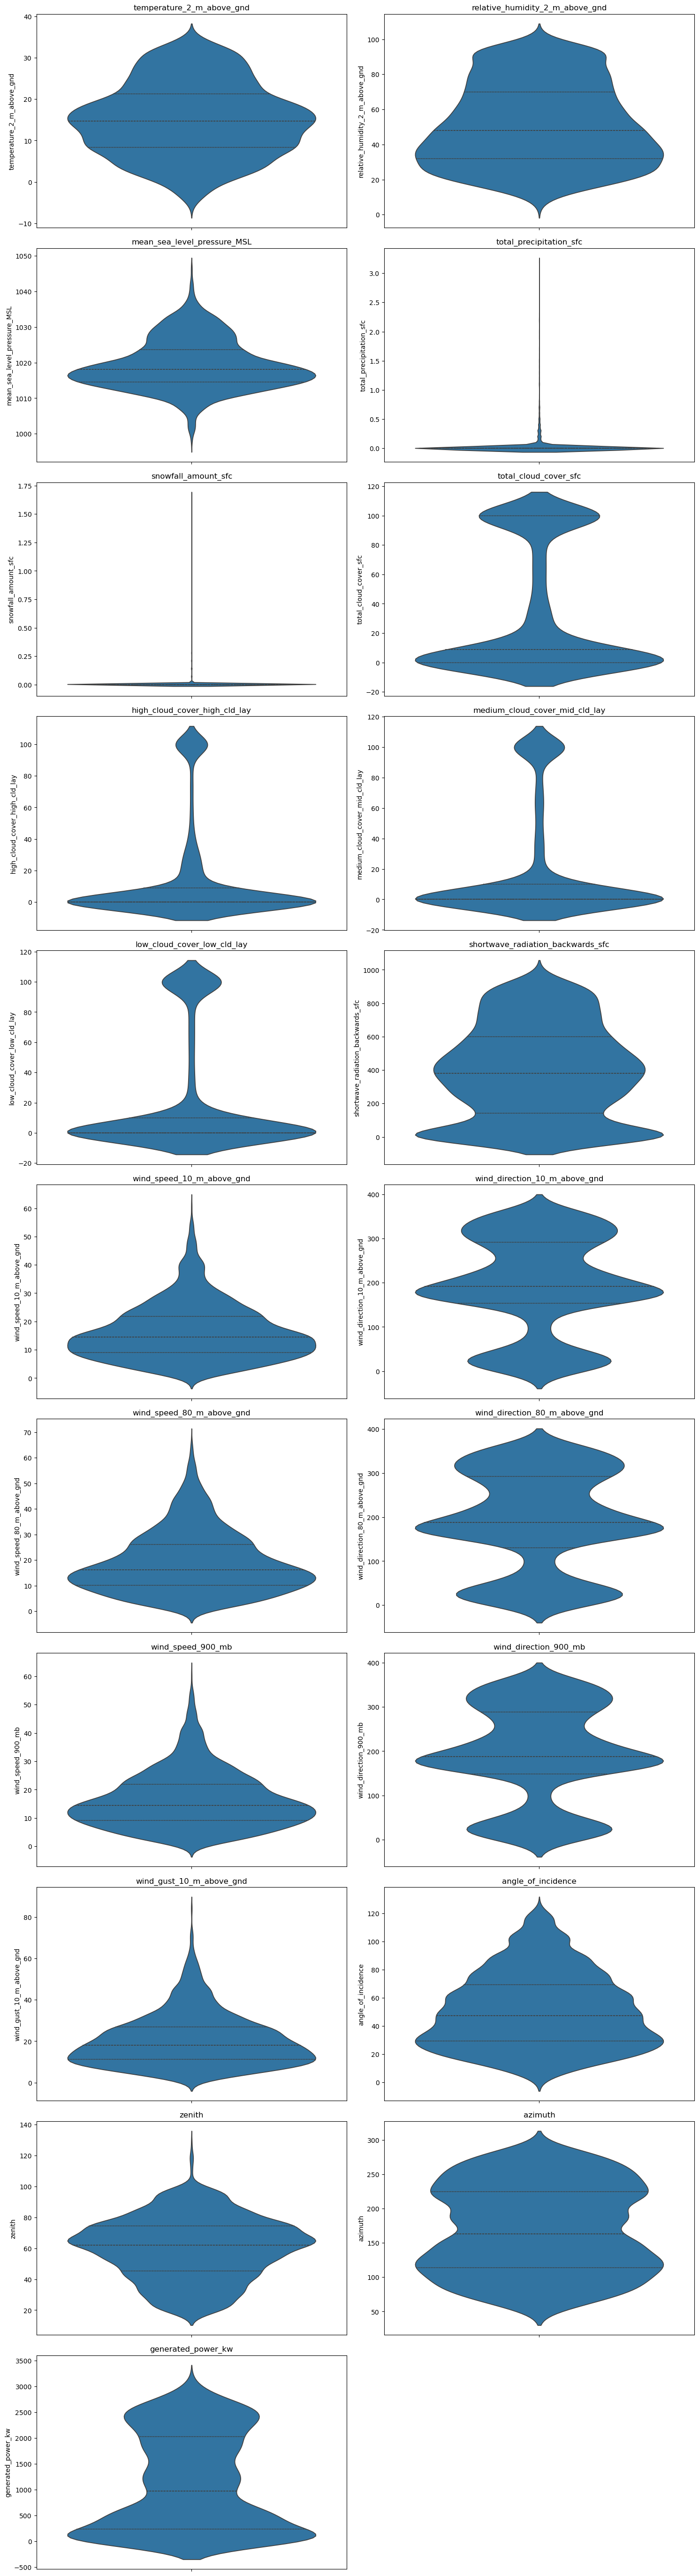

In [48]:
plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    
    sns.violinplot(
        y=df[feature],
        inner="quart"
    )
    
    plt.title(f"{feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Scatter plot

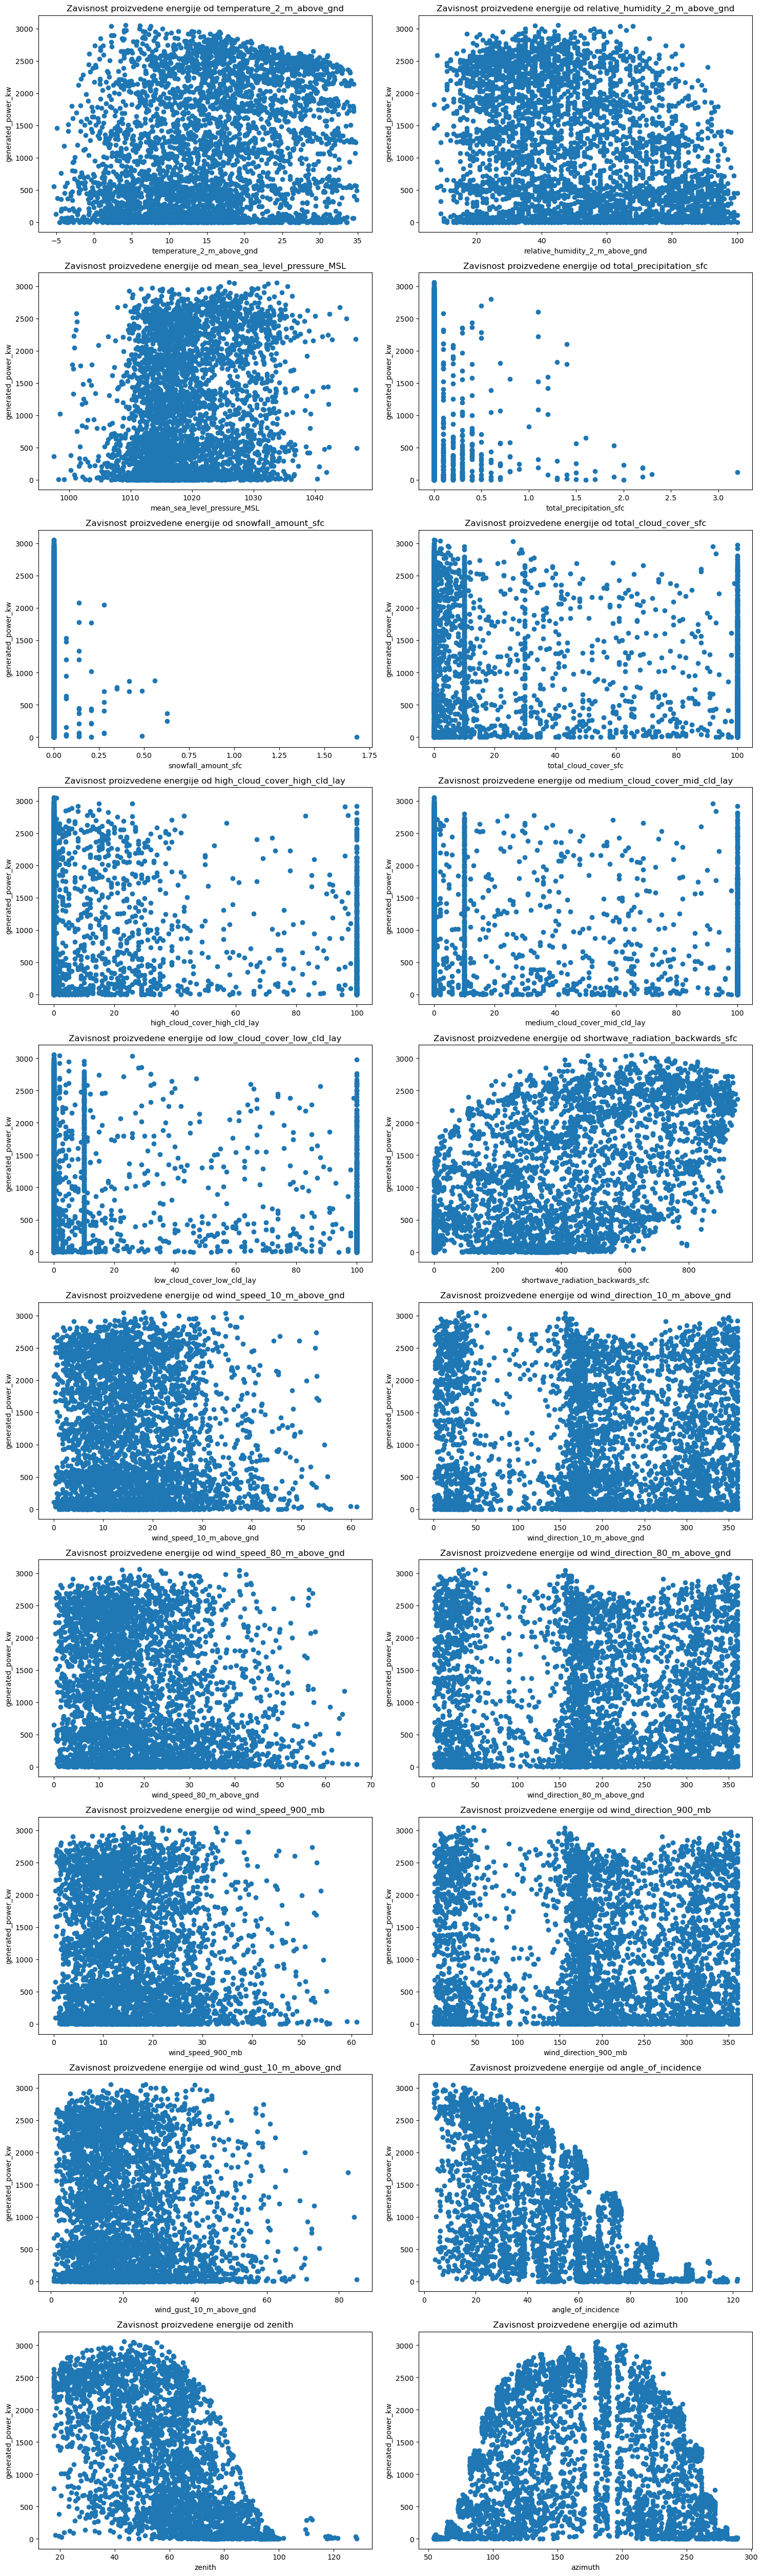

In [66]:
plt.figure(figsize=(15, 5 * rows))

input_columns = [col for col in df.columns if col != 'generated_power_kw']

for i, feature in enumerate(input_columns):
    plt.subplot(rows, cols, i + 1)

    x=df[feature]
    y=df['generated_power_kw']
    plt.scatter(x,y)
    
    plt.title(f"Zavisnost proizvedene energije od {feature}")
    plt.xlabel(feature)
    plt.ylabel('generated_power_kw')

plt.tight_layout()
plt.show()

**Zavisnost od zenith:** Vidljivo je da kako zenith raste, proizvedena energija opada. Ovo je očekivano, jer veći ugao zenith (bliže horizontu) smanjuje količinu solarne energije koja dolazi direktno do panela. 

**Zavisnost od azimuth:** Zavisnost nije toliko očigledna kao kod zenith, ali deluje da se veća energija proizvodi kada je azimuth u određenim rasponima (oko 150-250 stepeni). Ovo može ukazivati na optimalnu orijentaciju panela prema suncu u toku dana.

### Matrica korelacije

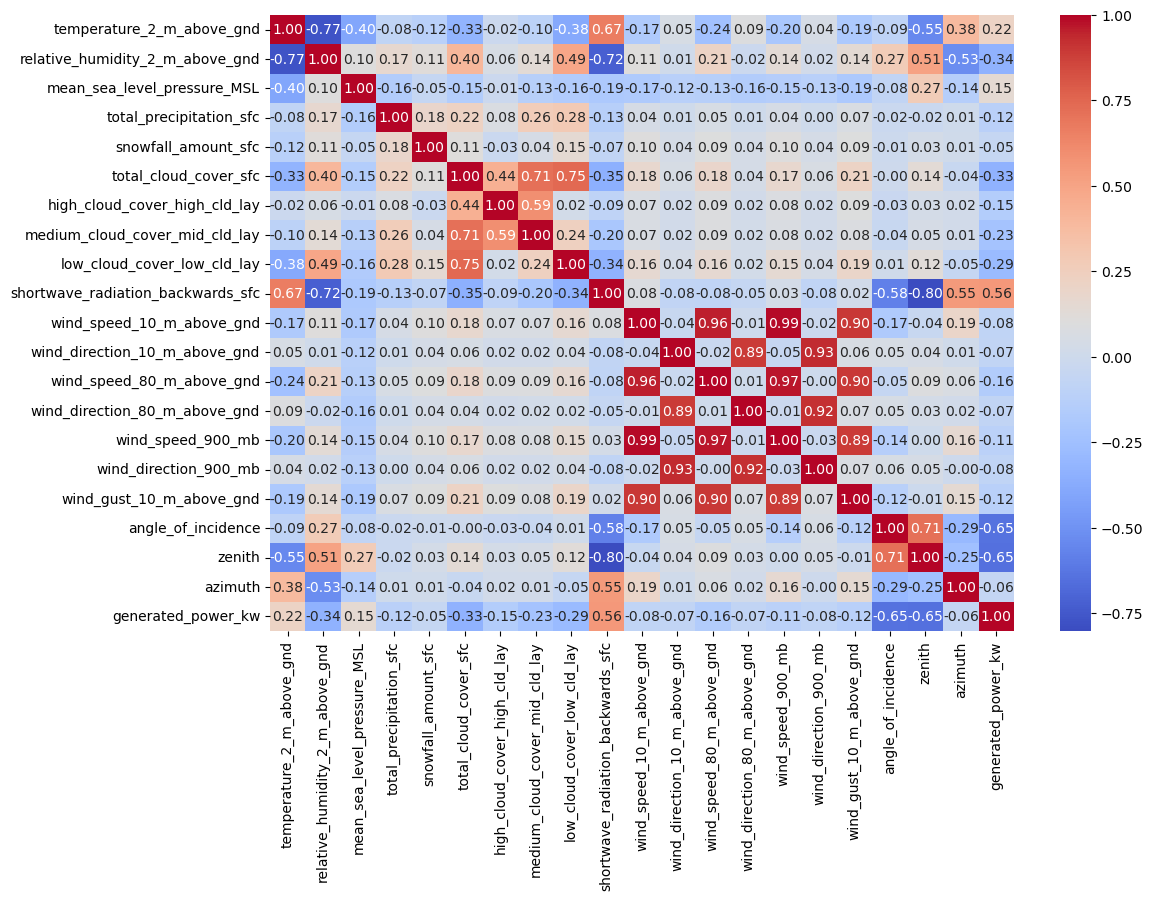

In [86]:
plt.figure(figsize=(12, 8))
df_corr=df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Može se primetiti visoka korelacija između sledećih atributa:
- **medium_cloud_cover_mid_cld_lay** i **total_cloud_cover_sfc**
- **low_cloud_cover_mid_cld_lay** i **total_cloud_cover_sfc**
- **wind_speed_80_m_above_gnd** i **wind_speed_10_m_above_gnd**
- **wind_speed_900_mb** i **wind_speed_10_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_10_m_above_gnd**
- **wind_direction_80_m_above_gnd** i **wind_direction_10_m_above_gnd**
- **wind_direction_900_mb** i **wind_direction_10_m_above_gnd**
- **wind_speed_900_mb** i **wind_speed_80_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_80_m_above_gnd**
- **wind_direction_900_mb** i **wind_direction_80_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_900_mb**
- **zenith** i **angle_of_incidence**
  
Ovo ukazuje na to da postoji neka vrsta linearne povezanosti između ovih atributa, što se može iskoristiti za redukciju broja atributa.

Atributi koji će se odstraniti na osnovu ovoga su: